Newton's Method is a second-order optimization algorithm that can be used to minimize a function by using both the first and second derivatives (the gradient and the Hessian) to update the parameters. For logistic regression, we can apply Newton's Method to optimize the model by iteratively adjusting the parameters based on the gradient and Hessian matrix.

Below is the executable code using Newton's Method for logistic regression on the Titanic dataset. We'll also include an analysis and plot to visualize the convergence of the algorithm.

Step-by-step explanation of the code:
Logistic Regression Model: We'll define the model and loss function.
Newton's Method: We'll calculate the gradient and Hessian for optimization.
Training: We'll train the model using the Titanic dataset.
Plotting: We will visualize the loss over the iterations to analyze the convergence.

# Newton's Method for Logistic Regression

Iteration 0, Loss: 0.4453
Converged at iteration 5

Accuracy on test set: 0.7472


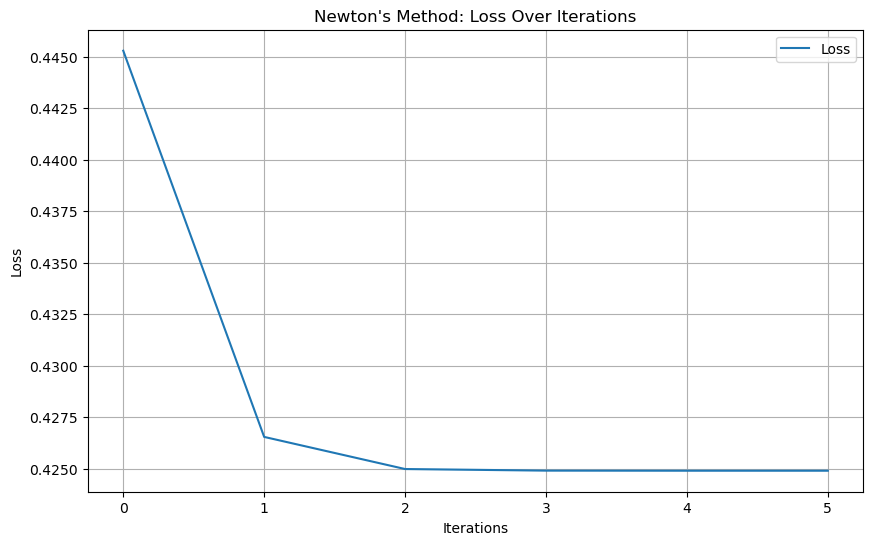

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Newton's Method for Logistic Regression
class LogisticRegressionNewton:
    def __init__(self, max_iter=100, tol=1e-6):
        """
        Initialize the Logistic Regression model with Newton's Method.
        - max_iter: The maximum number of iterations for convergence.
        - tol: The tolerance for convergence based on the change in loss.
        """
        self.max_iter = max_iter
        self.tol = tol
        self.losses = []  # To track loss over iterations

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def compute_gradient_and_hessian(self, X, y):
        """
        Compute the gradient and Hessian matrix for Newton's method.
        - Gradient is the first derivative.
        - Hessian is the second derivative.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        
        # Gradient
        error = predictions - y
        gradient_w = np.dot(X.T, error) / len(y)
        gradient_b = np.sum(error) / len(y)
        
        # Hessian (second derivative)
        diag = predictions * (1 - predictions)
        hessian_w = np.dot(X.T, diag[:, np.newaxis] * X) / len(y)
        hessian_b = np.sum(diag) / len(y)
        
        # Combine gradient and Hessian for weight and bias
        gradient = np.concatenate([gradient_w, np.array([gradient_b])])
        hessian = np.block([[hessian_w, np.zeros((X.shape[1], 1))], [np.zeros((1, X.shape[1])), hessian_b]])
        
        return gradient, hessian

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Newton's Method.
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []
        
        for iteration in range(self.max_iter):
            # Compute the gradient and Hessian
            gradient, hessian = self.compute_gradient_and_hessian(X, y)
            
            # Update the parameters using Newton's method
            hessian_inv = np.linalg.inv(hessian)
            update = np.dot(hessian_inv, gradient)
            
            # Update weights and bias
            self.weights -= update[:-1]
            self.bias -= update[-1]
            
            # Compute the loss and check for convergence
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            if iteration > 0 and np.abs(self.losses[-1] - self.losses[-2]) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

            # Print progress every 100 iterations
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss:.4f}")
        
        return self.weights, self.bias

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Newton's Method and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionNewton(max_iter=1000, tol=1e-6)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over iterations to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Newton's Method: Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


## Explanation of the code:
Data Preprocessing: We load and preprocess the Titanic dataset, standardizing the features for better optimization.
Newton's Method:
Gradient: The gradient is computed as the derivative of the binary cross-entropy loss function.
Hessian: The Hessian matrix (second derivative) is calculated to help adjust the learning rate dynamically.
The parameters (weights and bias) are updated using Newton's Method.
Training: The model is trained using the fit() method, which iteratively computes the gradient and Hessian, and updates the weights.
Convergence and Plotting: We track the loss at each iteration to visualize convergence. If the change in loss between iterations is smaller than a set tolerance, the algorithm stops early.
Expected Output:
Loss curve: A plot of loss over iterations will be displayed to analyze how quickly the model converges.
Accuracy: The model's accuracy on the test set will be printed.

# Newton method for finding optima

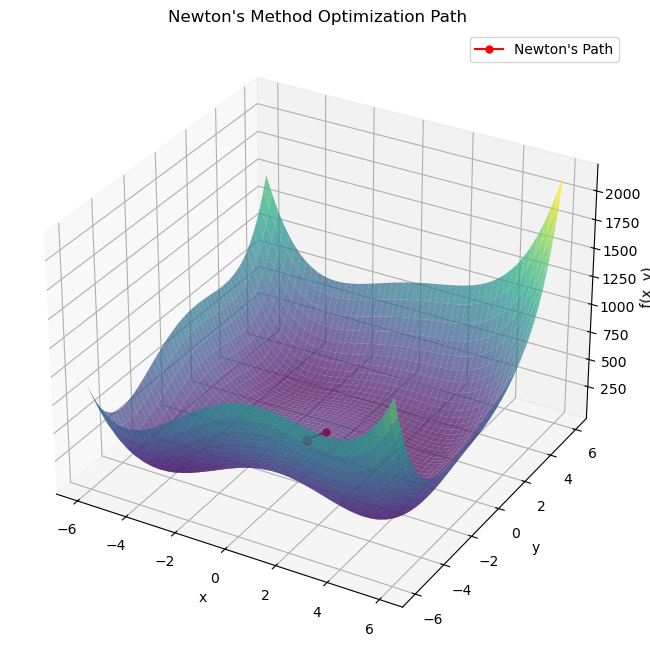

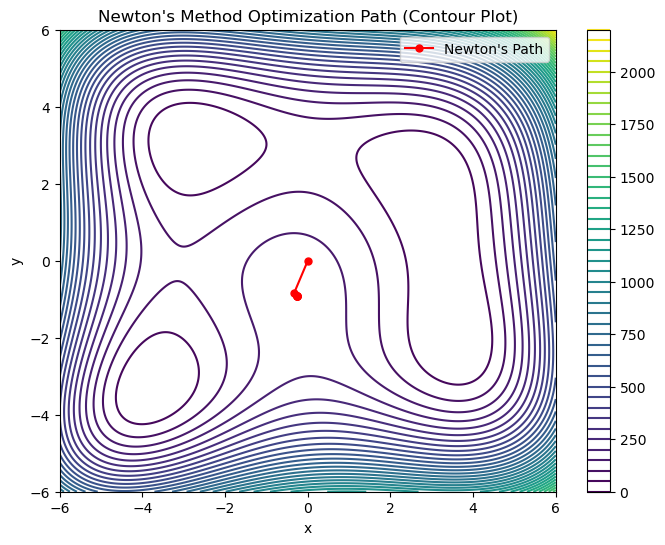

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Define the function (example: a simple 2D quadratic function)
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gradient of the function
def gradient(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])

# Hessian matrix (second derivatives)
def hessian(x, y):
    d2f_dx2 = 12*x**2 + 4*y - 42
    d2f_dy2 = 12*y**2 + 4*x - 26
    d2f_dxdy = 8*x + 4*y
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Newton's method for optimization
def newton_method(initial_guess, max_iter=100, tol=1e-6):
    x, y = initial_guess
    path = [(x, y)]  # To store the path of optimization
    for _ in range(max_iter):
        grad = gradient(x, y)
        H = hessian(x, y)
        
        # Newton's update rule
        H_inv = inv(H)  # Inverse of the Hessian
        update = np.dot(H_inv, grad)  # Direction of steepest descent
        x, y = np.array([x, y]) - update
        
        path.append((x, y))
        
        # Convergence check: if gradient is small enough, stop
        if np.linalg.norm(grad) < tol:
            break

    return np.array(path)

# Visualizing the optimization path
initial_guess = np.array([0, 0])  # Starting point
path = newton_method(initial_guess)

# Create a grid of points to plot the function surface
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the optimization path on top of the surface
path_x, path_y = path[:, 0], path[:, 1]
ax.plot(path_x, path_y, f(path_x, path_y), color='r', marker='o', markersize=5, label='Newton\'s Path')

ax.set_title("Newton's Method Optimization Path")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

# Also, plot the 2D contour plot with the optimization path
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(path_x, path_y, color='r', marker='o', markersize=5, label='Newton\'s Path')
plt.title("Newton's Method Optimization Path (Contour Plot)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()


Code Explanation:
Function Definition:

f(x, y) is the function we want to minimize (a commonly used 2D function).
gradient(x, y) computes the first derivatives (gradient).
hessian(x, y) computes the second derivatives (Hessian matrix).
Newton's Method:

The method takes an initial guess for the minimum and iteratively updates the parameters using the Newton update rule.
It stores the optimization path to visualize how the method progresses.
Visualization:

The surface plot shows the function's 3D landscape.
The contour plot visualizes the optimization path as it converges to the minimum.
Expected Output:
3D Surface Plot: Shows the function and the red path representing Newton's optimization path.
Contour Plot: Shows the function's contours with the red path indicating how Newton's method converges.

# Hessian plots

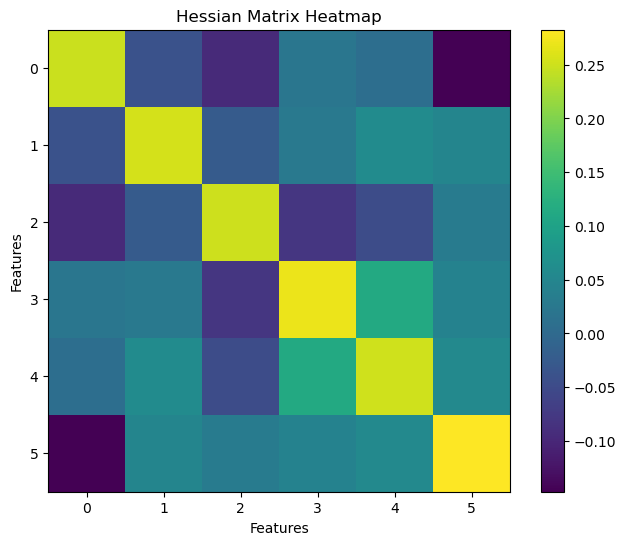

array([[ 0.24877153, -0.03911272, -0.09631393,  0.02078197,  0.00823595,
        -0.14724498],
       [-0.03911272,  0.25450787, -0.02367665,  0.02572009,  0.0598641 ,
         0.04772448],
       [-0.09631393, -0.02367665,  0.24918649, -0.07926958, -0.04771611,
         0.03184341],
       [ 0.02078197,  0.02572009, -0.07926958,  0.26912118,  0.11394909,
         0.04342367],
       [ 0.00823595,  0.0598641 , -0.04771611,  0.11394909,  0.2522393 ,
         0.05472633],
       [-0.14724498,  0.04772448,  0.03184341,  0.04342367,  0.05472633,
         0.28251015]])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Logistic Regression functions
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights, bias):
    """
    Compute the binary cross-entropy loss.
    """
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    # Add a small constant (1e-8) to avoid log(0)
    loss = log_loss(y, predictions)
    return loss

def compute_gradients(X, y, weights, bias):
    """
    Compute the gradient of the loss function.
    """
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    error = predictions - y
    dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
    db = np.sum(error) / len(y)       # Gradient with respect to bias
    return dw, db

def compute_hessian(X, y, weights, bias):
    """
    Compute the Hessian matrix (second derivatives of the loss function).
    """
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    # The sigmoid prime (first derivative)
    sigmoid_prime = predictions * (1 - predictions)
    
    # Hessian (second derivative) for weights
    H = np.dot(X.T * sigmoid_prime, X) / len(y)
    
    # Hessian for bias is the second derivative of the sigmoid function
    H_bias = np.sum(sigmoid_prime) / len(y)
    
    return H, H_bias

# Step 3: Plotting Hessian Matrix
def plot_hessian(X, y, weights, bias):
    """
    Compute and plot the Hessian matrix of the logistic regression model.
    """
    H, H_bias = compute_hessian(X, y, weights, bias)
    
    # Plot the Hessian matrix (determinant of Hessian or its eigenvalues)
    plt.figure(figsize=(8, 6))
    plt.imshow(H, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title("Hessian Matrix Heatmap")
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()
    
    return H

# Step 4: Train the model and plot Hessian
def train_and_plot_hessian():
    """
    Train the Logistic Regression model and plot the Hessian matrix.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the weights and bias for logistic regression
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    # Compute the Hessian matrix on the initial model parameters
    H = plot_hessian(X_train, y_train, weights, bias)
    
    # Optionally: Perform optimization to update weights, compute Hessian during optimization, etc.
    # For simplicity, we visualize the Hessian at the initial weights
    
    # Return Hessian for further analysis if needed
    return H

# Step 5: Run the training and plot Hessian function
train_and_plot_hessian()


# Quadratic and Quassi newton

In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Logistic regression gradient function
def logistic_gradient(theta, X, y):
    """
    Compute the gradient of the logistic loss function.

    Parameters:
    - theta: model parameters
    - X: feature matrix
    - y: target values

    Returns:
    - Gradient vector
    """
    m = len(y)
    predictions = 1 / (1 + np.exp(-np.dot(X, theta)))  # Sigmoid function
    gradient = np.dot(X.T, (predictions - y)) / m  # Gradient calculation
    return gradient

# Logistic regression loss function
def logistic_loss(theta, X, y):
    """
    Compute the logistic regression loss (binary cross-entropy).

    Parameters:
    - theta: model parameters
    - X: feature matrix
    - y: target values

    Returns:
    - Loss value
    """
    m = len(y)
    predictions = 1 / (1 + np.exp(-np.dot(X, theta)))  # Sigmoid function
    loss = -(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) / m
    return np.sum(loss)

# Main function to run the optimization
def train_and_evaluate(X, y, method='BFGS'):
    """
    Train the logistic regression model using a specified optimization method and evaluate accuracy.

    Parameters:
    - X: Feature matrix
    - y: Target vector
    - method: Optimization method ('BFGS', 'Newton-CG')

    Returns:
    - Optimized model parameters, accuracy, and loss
    """
    # Add intercept column (bias term) to the feature matrix
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize the model parameters (theta)
    initial_theta = np.zeros(X.shape[1])

    # Perform optimization using the specified method
    result = minimize(logistic_loss, initial_theta, args=(X, y), method=method, jac=logistic_gradient)

    # Extract the optimized parameters
    optimized_theta = result.x

    # Make predictions on the training set
    predictions = 1 / (1 + np.exp(-np.dot(X, optimized_theta)))
    predictions = (predictions >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y, predictions)

    # Calculate loss
    loss = logistic_loss(optimized_theta, X, y)

    return optimized_theta, accuracy, loss

# Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')  # Replace with your dataset path
    
    # Print the columns of the dataset for debugging
    print(f"Columns in dataset: {df.columns.tolist()}")
    
    # List of columns to drop (excluding 'Name' as it is non-useful)
    drop_columns = ['Name', 'Ticket', 'Cabin', 'Embarked']
    
    # Drop only those columns that exist in the dataset
    df = df.drop(columns=[col for col in drop_columns if col in df.columns])
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y


# Plot the loss curve
def plot_loss_curve(X, y, optimized_theta, method='BFGS'):
    """
    Plot the loss curve to visualize how the loss function evolves during optimization.
    """
    losses = []
    for _ in range(100):  # Set the number of iterations (100 is just an example)
        loss = logistic_loss(optimized_theta, X, y)
        losses.append(loss)
        # Optionally, you can update theta here and track the loss curve
    plt.plot(losses)
    plt.title(f"Loss Curve ({method})")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

# Main function to run and plot results
def main():
    # Load and preprocess the data
    X, y = load_and_preprocess_data()

    # Train and evaluate with BFGS (Quasi-Newton)
    print("\nTraining with BFGS (Quasi-Newton):")
    optimized_theta_bfgs, accuracy_bfgs, loss_bfgs = train_and_evaluate(X, y, method='BFGS')
    print(f"Accuracy (BFGS): {accuracy_bfgs:.4f}, Loss: {loss_bfgs:.4f}")

    # Plot loss curve for BFGS
    plot_loss_curve(X, y, optimized_theta_bfgs, method='BFGS')

    # Train and evaluate with Newton-CG (Newton's Method)
    print("\nTraining with Newton-CG (Newton's Method):")
    optimized_theta_newton, accuracy_newton, loss_newton = train_and_evaluate(X, y, method='Newton-CG')
    print(f"Accuracy (Newton-CG): {accuracy_newton:.4f}, Loss: {loss_newton:.4f}")

    # Plot loss curve for Newton-CG
    plot_loss_curve(X, y, optimized_theta_newton, method='Newton-CG')

# Run the main function
main()


Columns in dataset: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

Training with BFGS (Quasi-Newton):
Accuracy (BFGS): 0.8016, Loss: 0.4402


ValueError: shapes (887,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)